## Calcular o volume médio de transações por agência

In [1]:
# Importa as bibliotecas necessárias para a exploração do dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar dados do arquivo 'contas'
contas_df = pd.read_csv('/content/contas.csv')

In [3]:
# Carregar dados do arquivo 'transacoes'
transacoes_df = pd.read_csv('/content/transacoes.csv')

In [4]:
# Carregar dados do arquivo 'agencias'
agencias_df = pd.read_csv('/content/agencias.csv')

In [5]:
# Mesclar os dois conjuntos de dados com base na coluna 'num_conta'
merged_df = pd.merge(transacoes_df, contas_df, on='num_conta')

In [6]:
# Mesclar o resultado anterior com o conjunto de dados 'agencias' com base na coluna 'cod_agencia'
final_merged_df = pd.merge(merged_df, agencias_df[['cod_agencia','uf']], on='cod_agencia')

In [7]:
# Calcular o valor médio de transações por agência
media_transacoes_por_agencia = final_merged_df.groupby(['cod_agencia','uf'])['valor_transacao'].mean()

In [8]:
# Ordenar o resultado em ordem decrescente
media_transacoes_por_agencia = media_transacoes_por_agencia.sort_values(ascending=False)

In [9]:
# Arredondar os valores para duas casas decimais
media_transacoes_por_agencia = media_transacoes_por_agencia.round(2)

In [ ]:
# Exibir o resultado
media_transacoes_por_agencia

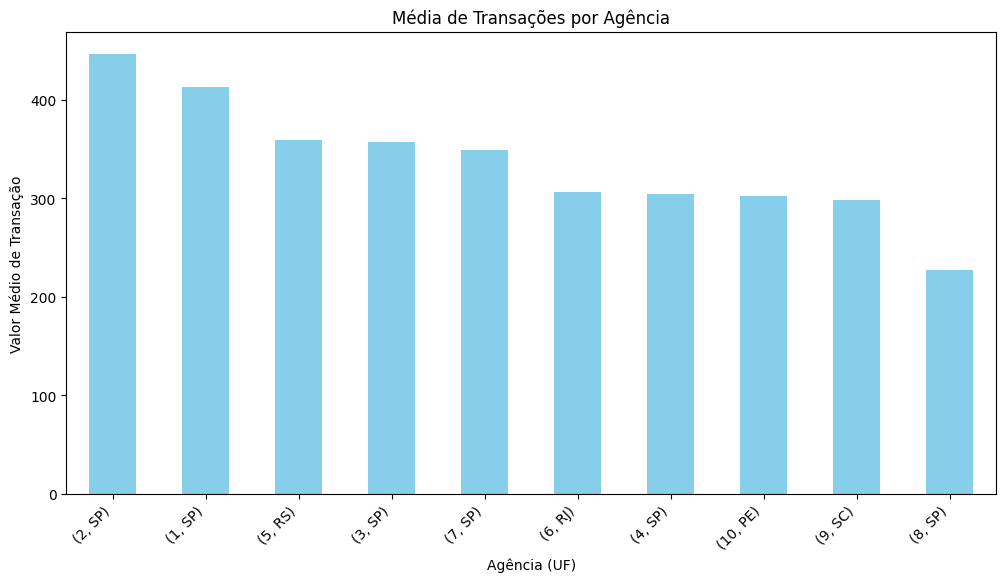

In [11]:
# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
media_transacoes_por_agencia.plot(kind='bar', color='skyblue')
plt.title('Média de Transações por Agência')
plt.xlabel('Agência (UF)')
plt.ylabel('Valor Médio de Transação')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.show()